# Predictive Analytics for Bank Marketing with Python

## 1. Introduction

In this Jupyter Notebook, we will use a bank marketing campaign dataset to perform Exploratory Data Analysis (EDA) with pandas, seaborn and missingno library.

The bank conducted marketing campaign mostly via phone calls to offer clients to place a term deposit. If the client agreed to place the deposit, the client is marked as 'yes' for subscribed to a term deposit. Otherwise, the client is marked as 'no'.

## 2. Exploratory Data Analysis (EDA)

### 2.1. Library and Data Import

Below are the libraries we will be using for EDA.

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import math

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Import
data = pd.read_csv('C:/Users/Lenovo/Downloads/PortugalBank/bank-additional-full.csv', delimiter =';', na_values = 'unknown')
# Remember to update the filepath to the correct location where you have saved the CSV file

In [3]:
# Take a quick glance at the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2. Univarivate Data Analysis

#### 2.2.1. Review summary statistics

In [4]:
# Display summary statistics
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [5]:
# Transpose the summary statistics for better view
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188,NaN,NaN,NaN,40.0241,10.4212,17,32,38,47,98
job,40858,11,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41108,3,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,39457,7,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,32591,2,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,40198,2,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,40198,2,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2.2. Review data types

In [6]:
# Review data types of each column in Qualified Leads
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# Summarise number of columns by data type
data.dtypes.value_counts()

object     11
float64     5
int64       5
dtype: int64

#### 2.2.3. Examine distribution of data

##### CATEGORICAL DATA

In [8]:
# Identify column names containing categorical data
categorical_column = data.select_dtypes(object).columns
print(categorical_column)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [9]:
# Isolate all columns containing categorical data
data_categorical = data[categorical_column]
data_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


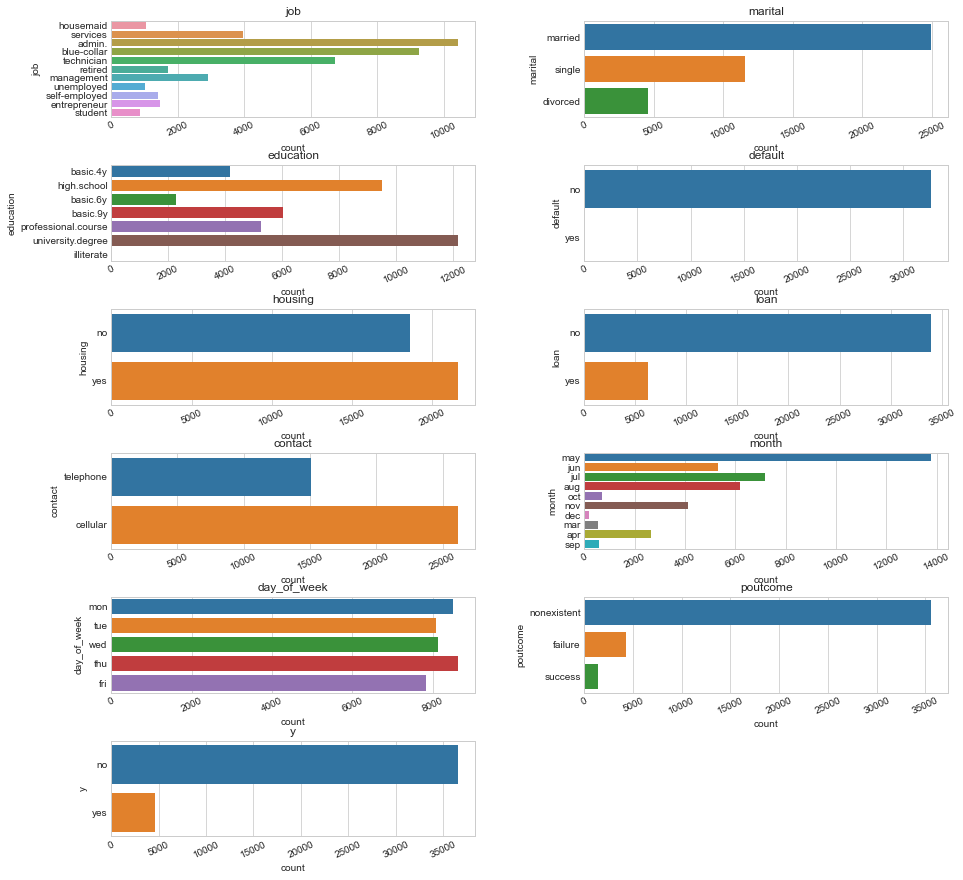

In [10]:
# Define a function to plot distribution
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1])/cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

# Plot distribution of categorical data
plot_distribution(data_categorical, cols = 2, width = 15, height = 15, hspace = 0.5, wspace = 0.3)

##### NUMERICAL DATA

In [11]:
# Isolate all columns containing numerical data by dropping categorical data
data_numerical = data.drop(columns = categorical_column)
data_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


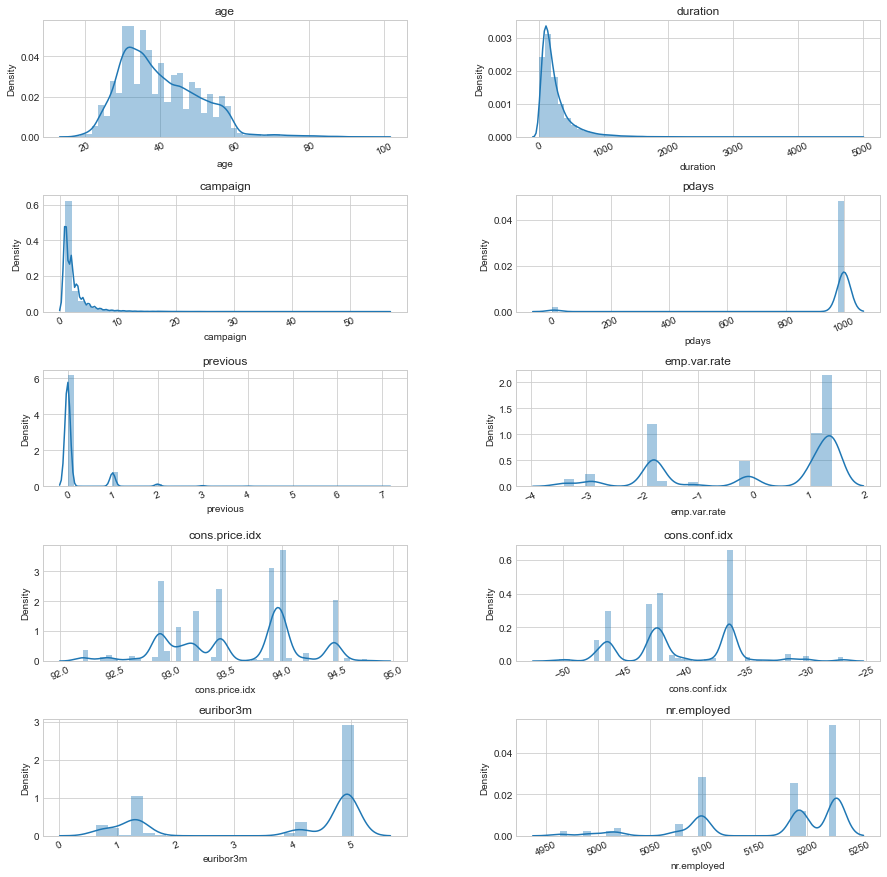

In [12]:
# Plot distribution of numercial data
plot_distribution(data_numerical, cols = 2, width = 15, height = 15, hspace = 0.5, wspace = 0.3)

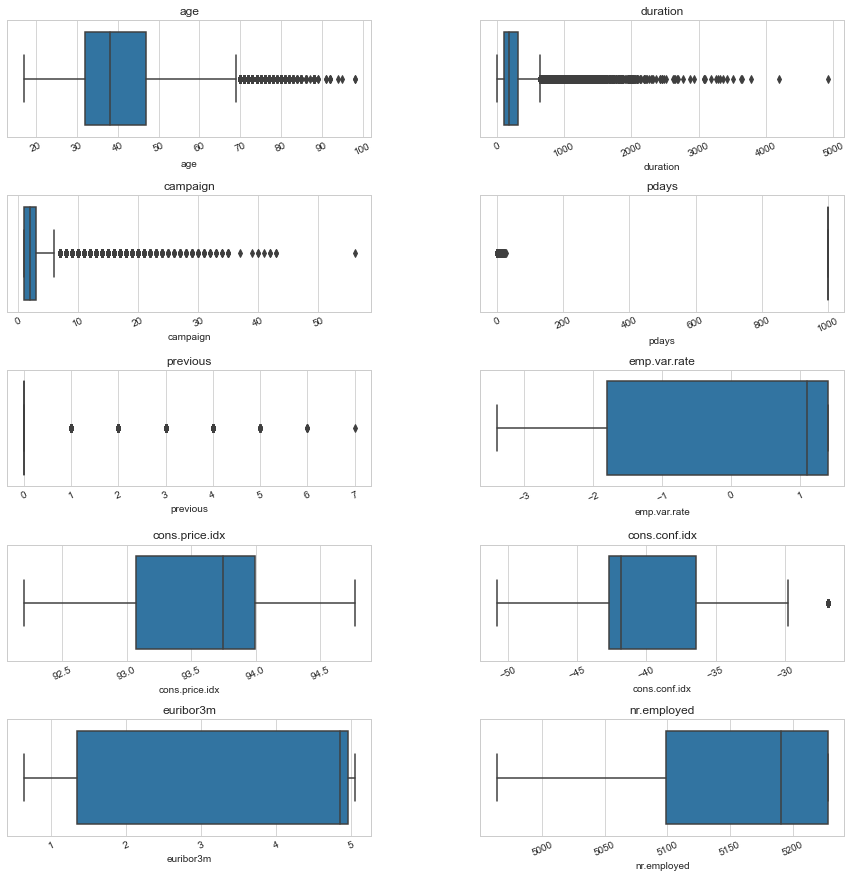

In [13]:
# Create box plots to summarise numerical data
def box_plot(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1])/cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        g = sns.boxplot(dataset[column])
        plt.xticks(rotation=25)
            
box_plot(data_numerical, cols = 2, width = 15, height = 15, hspace = 0.5, wspace = 0.3)

#### 2.2.4. Assess missing values

<AxesSubplot:>

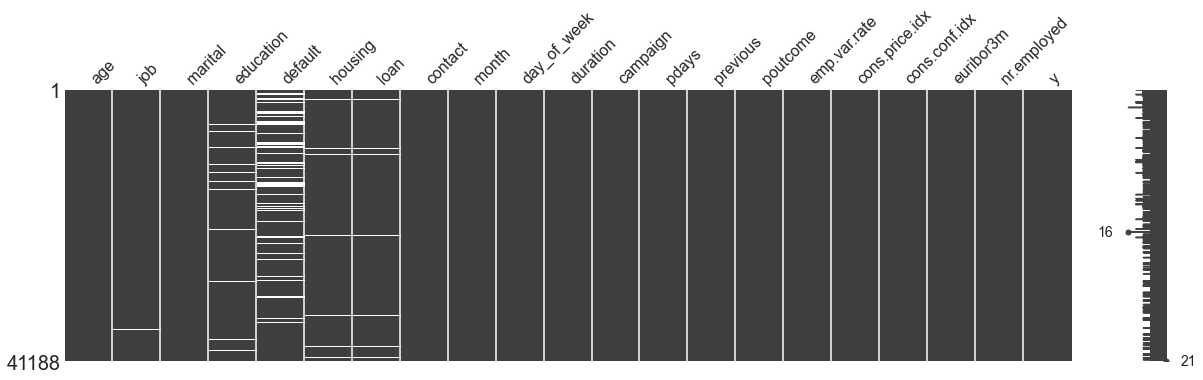

In [14]:
# Display nullity matrix
missingno.matrix(data, figsize = (20,5))

<AxesSubplot:>

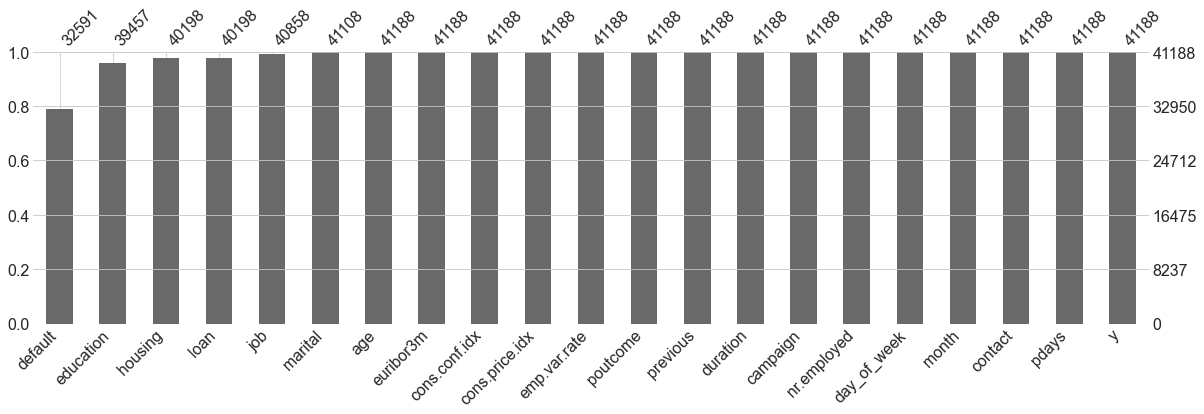

In [15]:
# Rank features based on descending number of missing values for Closed Deals
missingno.bar(data, sort = 'ascending', figsize = (20,5))

In [16]:
# Count missing values per column
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

## 3. Feature Cleaning, Engineering and Imputation

In this section, we will attempt to cleanse and isolate the most important features to our prediction model. To avoid accidentally making changes to the original dataset, we will create 2 new dataframes. 

In [17]:
data_bin = pd.DataFrame()
data_con = pd.DataFrame()

### 3.1. Feature: y

Let's take a closer look at the most important feature which indicates the prediction outcome. We will change the string to a binary 0/1 with 1 means 'yes' and 0 mean 'no'

In [18]:
# Change y feature into binary 0/1
data.loc[data['y'] == 'yes', 'y'] = 1
data.loc[data['y'] == 'no', 'y'] = 0

data_bin['y'] = data['y']
data_con['y'] = data['y']

<AxesSubplot:xlabel='count', ylabel='y'>

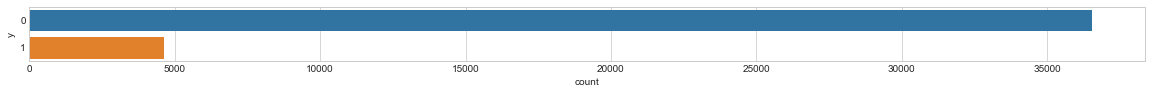

In [19]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,1))
sns.countplot(y = 'y', data = data)

### 3.2. Feature: age

Let's take a look at how clients' ages are distributed across the age range. 

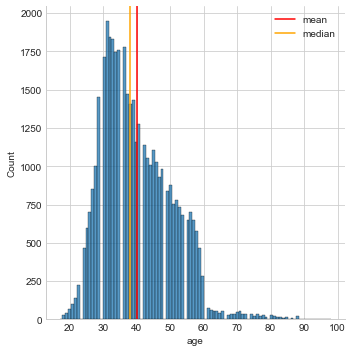

In [20]:
# Basic histogram
ax = sns.displot(data, x = 'age')
plt.axvline(x=np.mean(data.age), color='red', label='mean')
plt.axvline(x=np.median(data.age), color='orange', label='median')
plt.legend(loc='upper right')

The histogram shows the distribution of the age feature along with the mean and median. Since the mean is NOT EQUAL to the median, we know age feature does NOT follow a normal distribution

<AxesSubplot:xlabel='age'>

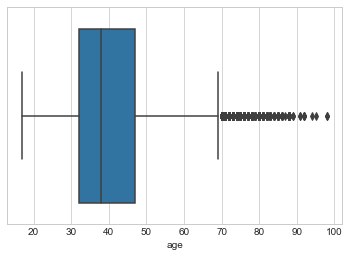

In [21]:
# Boxplot - Another way to look at distribution
sns.boxplot(x=data['age'])

The boxplot (a.k.a. box and whisker plot) is helpful in understanding the skewness and outliers of a dataset. In this case, we can clearly see the age feature is left-skewed and there are a few outliers for age 70 and above. 

However, based on the value range, there are simply too many values to spot any trends or patterns. So let's try binning the data in equally sized buckets and add the original feature to the data_con dataframe. 

In [22]:
# Use pandas cut function to bin the data
data_bin['age'] = pd.cut(data['age'], 10)
data_con['age'] = data['age']

Next, we will plot the age feature (after binning) against the feature y

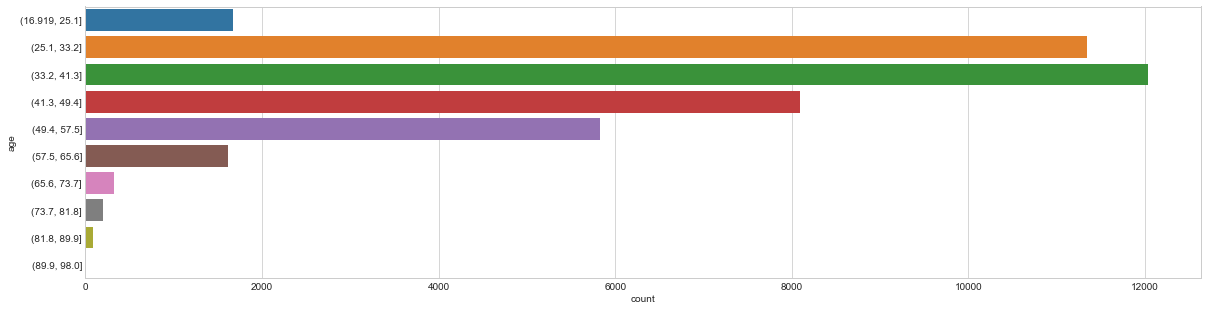

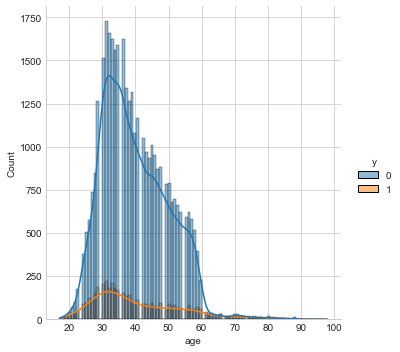

In [23]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='age', data = data_bin);
sns.displot(data = data, x = 'age', hue = 'y', kde = True)

### 3.3. Feature: job

<AxesSubplot:xlabel='count', ylabel='job'>

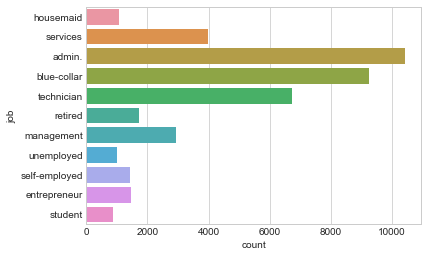

In [24]:
# Display distribution
sns.countplot(y='job', data = data)

<AxesSubplot:xlabel='count', ylabel='job'>

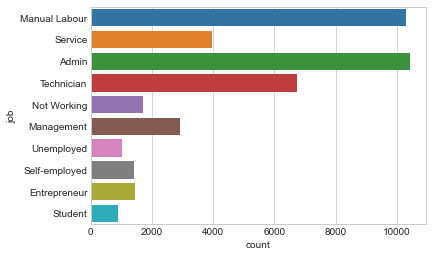

In [25]:
# Since there are too many values, let's try grouping them together
data.loc[data['job'] == 'housemaid', 'job'] = "Manual Labour"
data.loc[data['job'] == 'services', 'job'] = "Service"
data.loc[data['job'] == 'admin.', 'job'] = "Admin"
data.loc[data['job'] == 'blue-collar', 'job'] = "Manual Labour"
data.loc[data['job'] == 'technician', 'job'] = "Technician"
data.loc[data['job'] == 'retired', 'job'] = "Not Working"
data.loc[data['job'] == 'management', 'job'] = "Management"
data.loc[data['job'] == 'unemployed', 'job'] = "Unemployed"
data.loc[data['job'] == 'self-employed', 'job'] = "Self-employed"
data.loc[data['job'] == 'entrepreneur', 'job'] = "Entrepreneur"
data.loc[data['job'] == 'student', 'job'] = "Student"

data_bin['job'] = data['job']
data_con['job'] = data['job']

sns.countplot(y='job', data = data)

### 3.4. Feature: education

<AxesSubplot:xlabel='count', ylabel='education'>

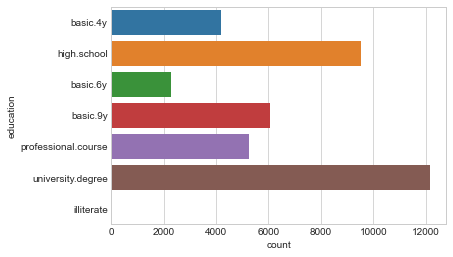

In [26]:
# Display distribution
sns.countplot(y='education', data = data)

<AxesSubplot:xlabel='count', ylabel='education'>

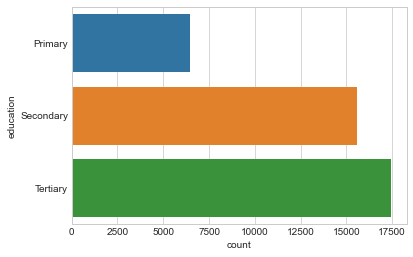

In [27]:
# Since there are too many values, let's try grouping them together
data.loc[data['education'] == 'basic.4y', 'education'] = "Primary"
data.loc[data['education'] == 'high.school', 'education'] = "Secondary"
data.loc[data['education'] == 'basic.6y', 'education'] = "Primary"
data.loc[data['education'] == 'basic.9y', 'education'] = "Secondary"
data.loc[data['education'] == 'professional.course', 'education'] = "Tertiary"
data.loc[data['education'] == 'university.degree', 'education'] = "Tertiary"
data.loc[data['education'] == 'illiterate', 'education'] = "Primary"

data_bin['education'] = data['education']
data_con['education'] = data['education']

sns.countplot(y='education', data = data)

### 3.5. Feature: duration

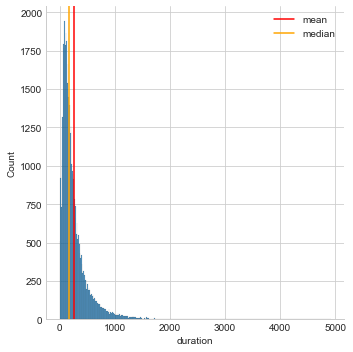

In [28]:
# Display distribution
ax = sns.displot(data, x = 'duration')
plt.axvline(x=np.mean(data.duration), color='red', label='mean')
plt.axvline(x=np.median(data.duration), color='orange', label='median')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='duration'>

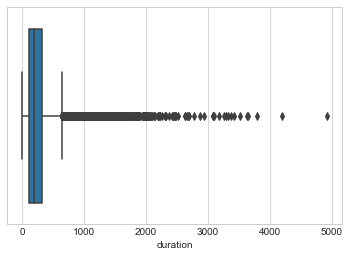

In [29]:
# Boxplot - Another way to look at distribution
sns.boxplot(x=data['duration'])

This feature is highly skewed towards the left. Upon further investigation, we realise this feature affects the output target (e.g. if duration = 0 then y = 'no'). 

Since the value of this feature is not known before making the call, it can't be one of the predicting factor whether a client will subscribe to the term deposit or not. Therefore we won't include this feature in our predicting model. 

### 3.7. Feature: campaign

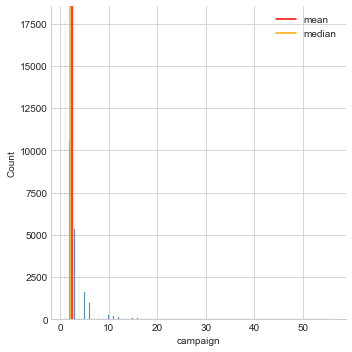

In [30]:
# Display distribution
ax = sns.displot(data, x = 'campaign')
plt.axvline(x=np.mean(data.campaign), color='red', label='mean')
plt.axvline(x=np.median(data.campaign), color='orange', label='median')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='campaign'>

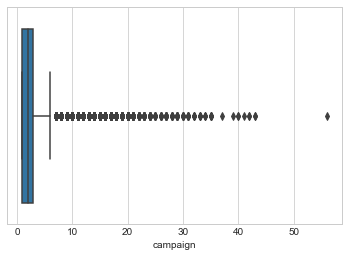

In [31]:
# Boxplot - Another way to look at distribution
sns.boxplot(x=data['campaign'])

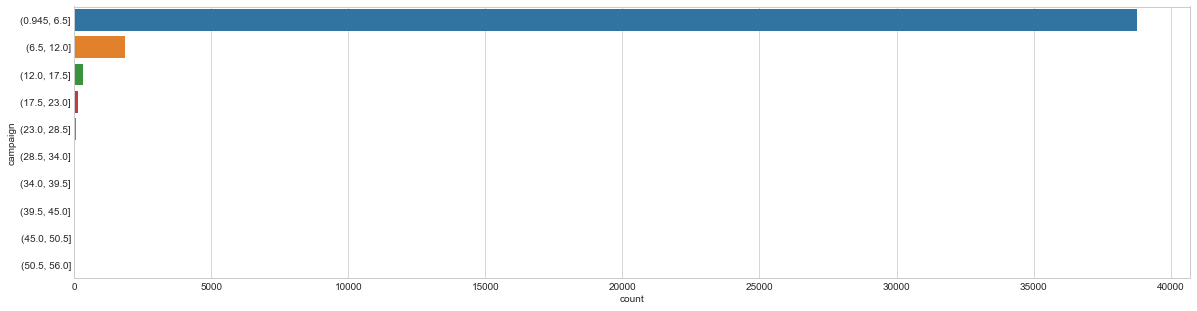

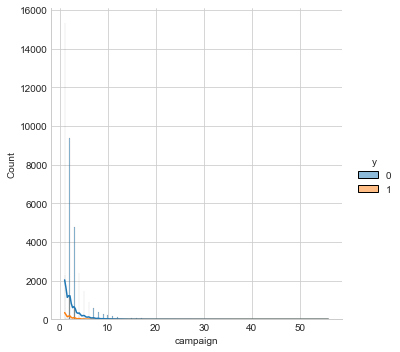

In [32]:
# Use pandas cut function to bin the data
data_bin['campaign'] = pd.cut(data['campaign'], 10)
data_con['campaign'] = data['campaign']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='campaign', data = data_bin);
sns.displot(data = data, x = 'campaign', hue = 'y', kde = True)

### 3.8. Feature: pdays

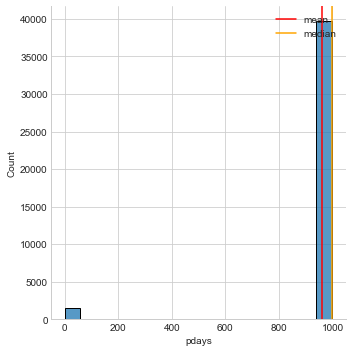

In [33]:
# Display distribution
ax = sns.displot(data, x = 'pdays')
plt.axvline(x=np.mean(data.pdays), color='red', label='mean')
plt.axvline(x=np.median(data.pdays), color='orange', label='median')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='pdays'>

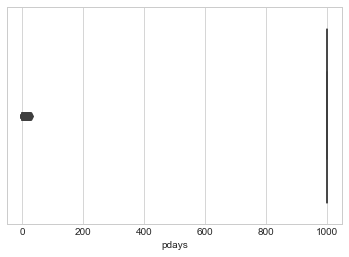

In [34]:
sns.boxplot(x=data['pdays'])

This feature is heavily skewed to the right. The shape of the histogram suggested many records have very high pdays which requires further checking. After reading the data description, it's noted that 999 means client was not previously contacted.

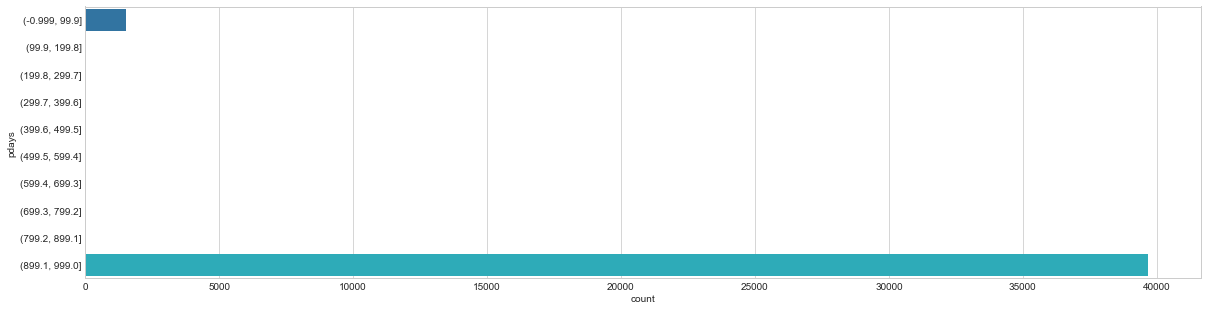

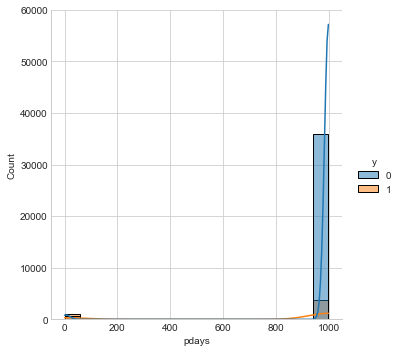

In [35]:
# Use pandas cut function to bin the data
data_bin['pdays'] = pd.cut(data['pdays'], 10)
data_con['pdays'] = data['pdays']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='pdays', data = data_bin);
sns.displot(data = data, x = 'pdays', hue = 'y', kde = True)

### 3.9. Feature: previous

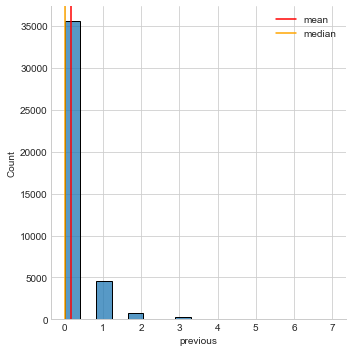

In [36]:
# Display distribution
ax = sns.displot(data, x = 'previous')
plt.axvline(x=np.mean(data.previous), color='red', label='mean')
plt.axvline(x=np.median(data.previous), color='orange', label='median')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='previous'>

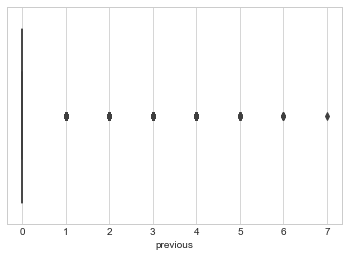

In [37]:
sns.boxplot(x=data['previous'])

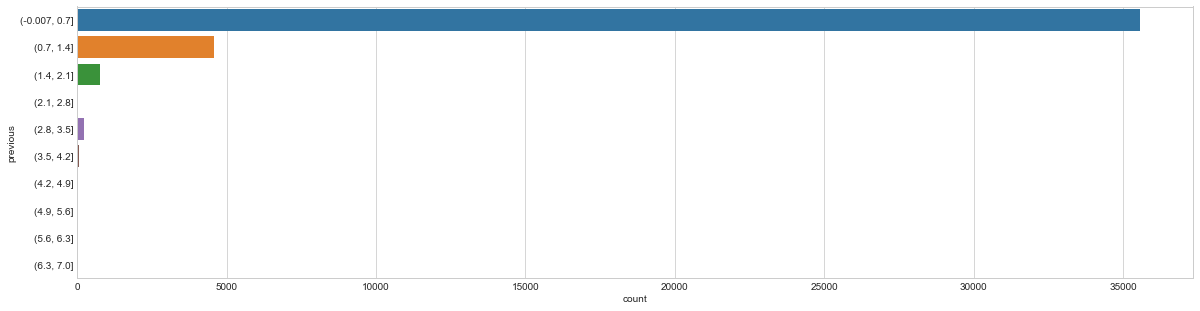

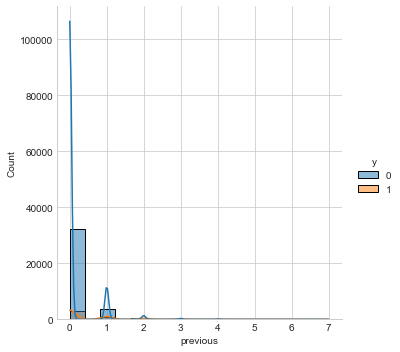

In [38]:
# Use pandas cut function to bin the data
data_bin['previous'] = pd.cut(data['previous'], 10)
data_con['previous'] = data['previous']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='previous', data = data_bin);
sns.displot(data = data, x = 'previous', hue = 'y', kde = True)

### 3.10. Feature: emp.var.rate

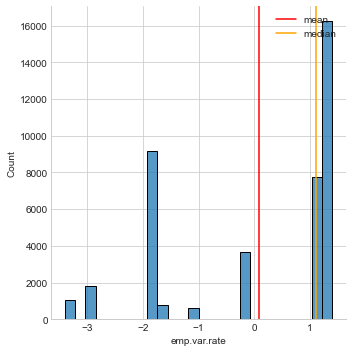

In [39]:
# Display distribution
ax = sns.displot(data, x = 'emp.var.rate')
plt.axvline(x=np.mean(data['emp.var.rate']), color='red', label='mean')
plt.axvline(x=np.median(data['emp.var.rate']), color='orange', label='median')
plt.legend(loc='upper right')

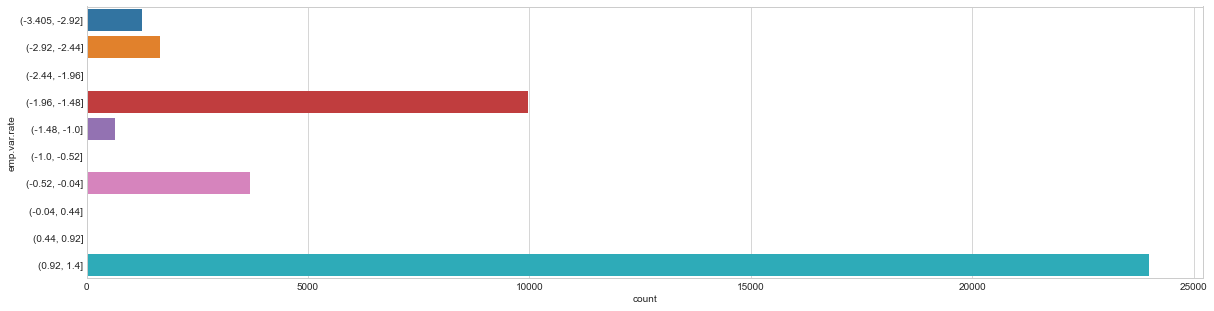

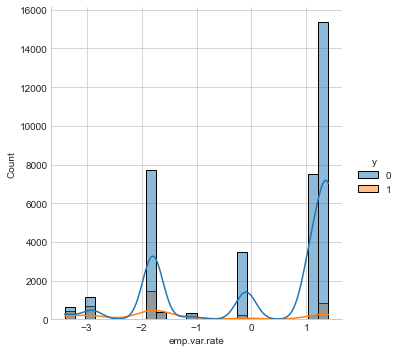

In [40]:
# Use pandas cut function to bin the data
data_bin['emp.var.rate'] = pd.cut(data['emp.var.rate'], 10)
data_con['emp.var.rate'] = data['emp.var.rate']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='emp.var.rate', data = data_bin);
sns.displot(data = data, x = 'emp.var.rate', hue = 'y', kde = True)

### 3.11. Feature: cons.price.idx

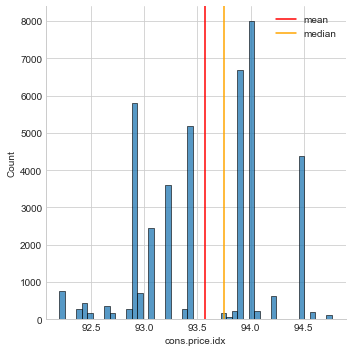

In [41]:
# Display distribution
ax = sns.displot(data, x = 'cons.price.idx')
plt.axvline(x=np.mean(data['cons.price.idx']), color='red', label='mean')
plt.axvline(x=np.median(data['cons.price.idx']), color='orange', label='median')
plt.legend(loc='upper right')

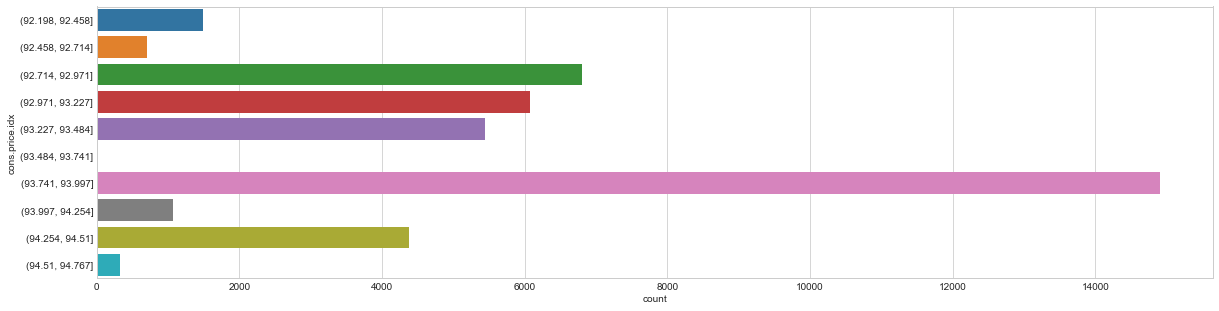

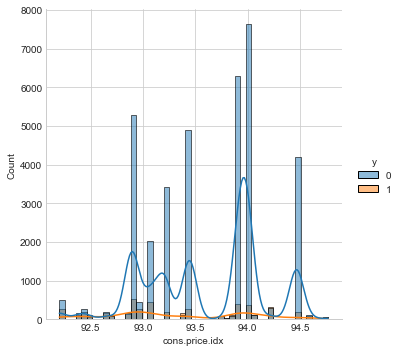

In [42]:
# Use pandas cut function to bin the data
data_bin['cons.price.idx'] = pd.cut(data['cons.price.idx'], 10)
data_con['cons.price.idx'] = data['cons.price.idx']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='cons.price.idx', data = data_bin);
sns.displot(data = data, x = 'cons.price.idx', hue = 'y', kde = True)

### 3.12. Feature: cons.conf.idx

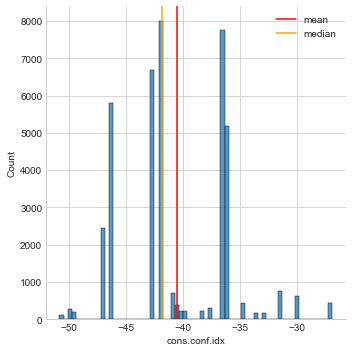

In [43]:
# Display distribution
ax = sns.displot(data, x = 'cons.conf.idx')
plt.axvline(x=np.mean(data['cons.conf.idx']), color='red', label='mean')
plt.axvline(x=np.median(data['cons.conf.idx']), color='orange', label='median')
plt.legend(loc='upper right')

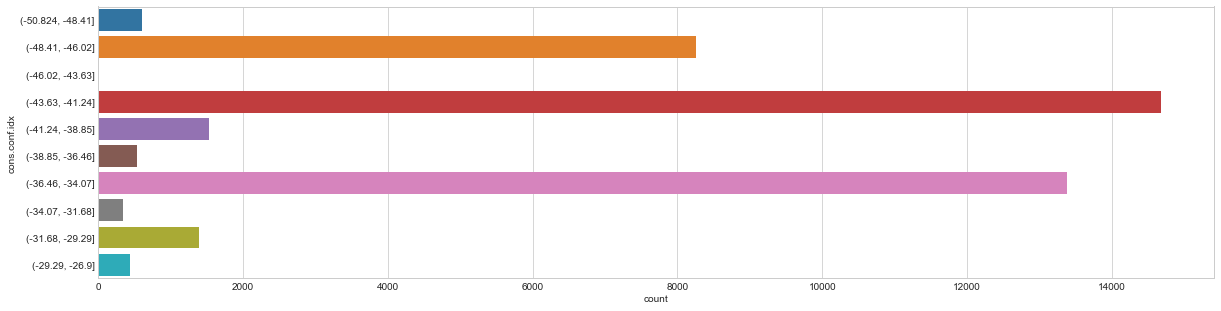

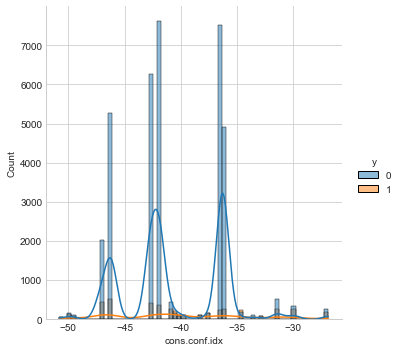

In [44]:
# Use pandas cut function to bin the data
data_bin['cons.conf.idx'] = pd.cut(data['cons.conf.idx'], 10)
data_con['cons.conf.idx'] = data['cons.conf.idx']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='cons.conf.idx', data = data_bin);
sns.displot(data = data, x = 'cons.conf.idx', hue = 'y', kde = True)

### 3.13. Feature: euribor3m

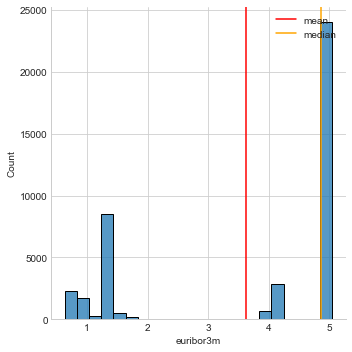

In [45]:
# Display distribution
ax = sns.displot(data, x = 'euribor3m')
plt.axvline(x=np.mean(data['euribor3m']), color='red', label='mean')
plt.axvline(x=np.median(data['euribor3m']), color='orange', label='median')
plt.legend(loc='upper right')

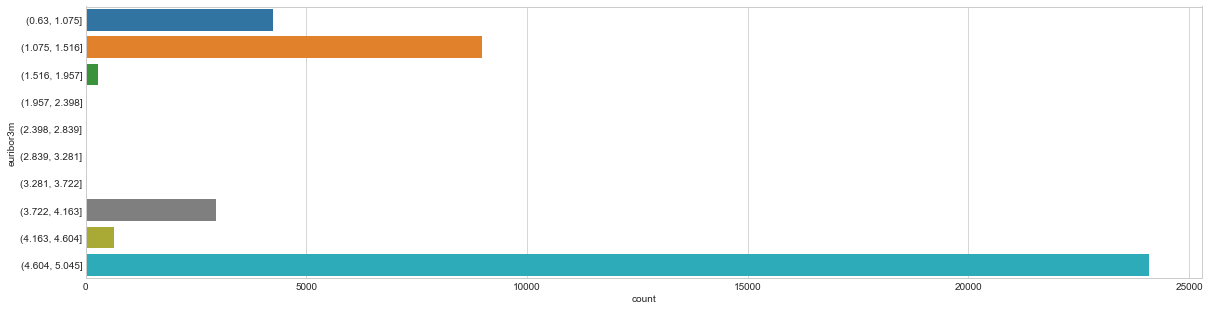

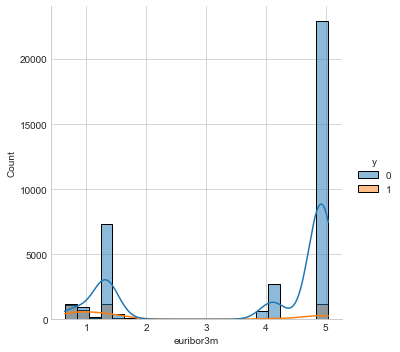

In [46]:
# Use pandas cut function to bin the data
data_bin['euribor3m'] = pd.cut(data['euribor3m'], 10)
data_con['euribor3m'] = data['euribor3m']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='euribor3m', data = data_bin);
sns.displot(data = data, x = 'euribor3m', hue = 'y', kde = True)

### 3.14. Feature: nr.employed

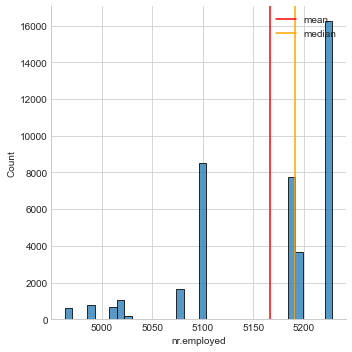

In [47]:
# Display distribution
ax = sns.displot(data, x = 'nr.employed')
plt.axvline(x=np.mean(data['nr.employed']), color='red', label='mean')
plt.axvline(x=np.median(data['nr.employed']), color='orange', label='median')
plt.legend(loc='upper right')

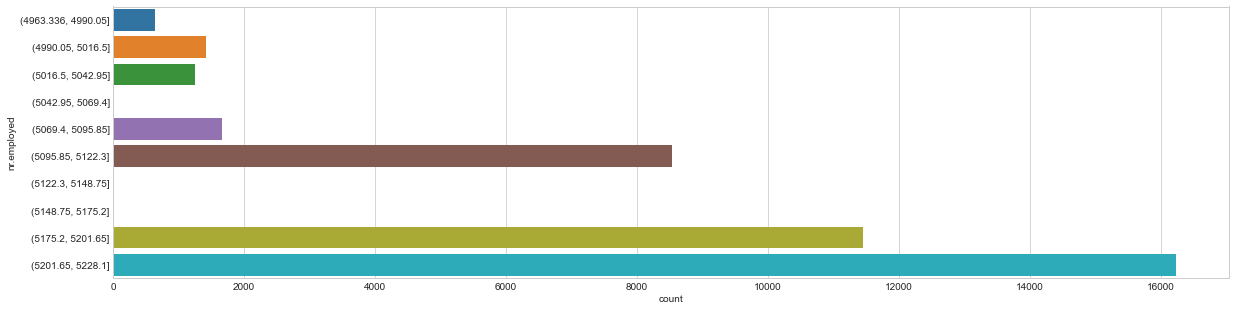

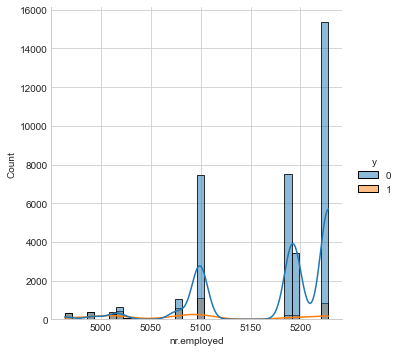

In [48]:
# Use pandas cut function to bin the data
data_bin['nr.employed'] = pd.cut(data['nr.employed'], 10)
data_con['nr.employed'] = data['nr.employed']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20,5))
sns.countplot(y='nr.employed', data = data_bin);
sns.displot(data = data, x = 'nr.employed', hue = 'y', kde = True)

### 3.15. Feature: marital, default, housing, loan, contact, poutcome, month,day_of_week

In [49]:
# Consider in good shape, hence passing through
data_con['marital'] = data_bin['marital'] = data['marital']
data_con['default'] = data_bin['default'] = data['default']
data_con['housing'] = data_bin['housing'] = data['housing']
data_con['loan'] = data_bin['loan'] = data['loan']
data_con['contact'] = data_bin['contact'] = data['contact']
data_con['poutcome'] = data_bin['poutcome'] = data['poutcome']
data_con['month'] = data_bin['month'] = data['month']
data_con['day_of_week'] = data_bin['day_of_week'] = data['day_of_week']

## 4. Bivariate Data Analysis

### 4.1. Compare categorical values to categorical values

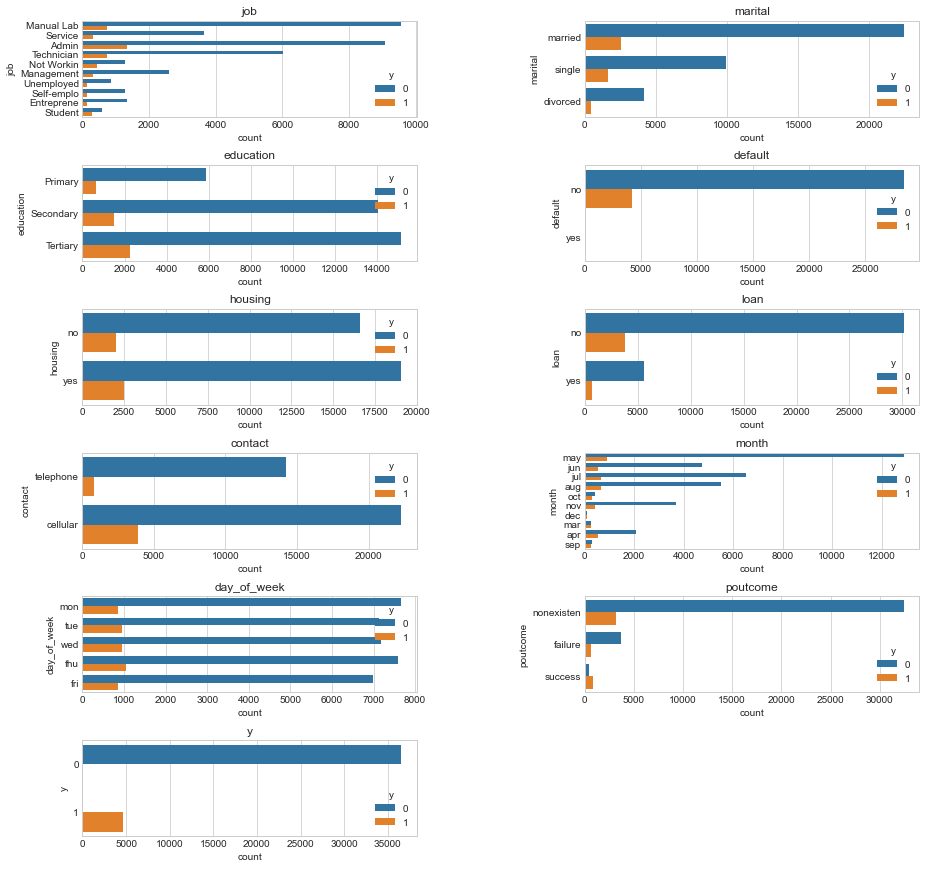

In [50]:
# Plot a count of categories from all categorical columns split by the decision to subscribe to a term deposit
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset[categorical_column]
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.countplot(y=column, hue=hue, data=dataset)
        substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
        g.set(yticklabels=substrings)

plot_bivariate_bar(data, hue='y', cols=2, width=15, height=15, hspace=0.5, wspace=0.5)

<AxesSubplot:xlabel='count', ylabel='poutcome'>

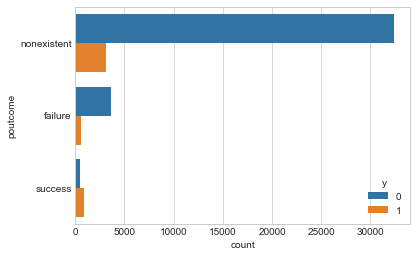

In [51]:
# Relationship between outcome of previous campaign and client's decision to subscribe to term deposit
sns.countplot(y='poutcome', hue='y', data=data)

### 4.2. Compare numerical values against numerical values

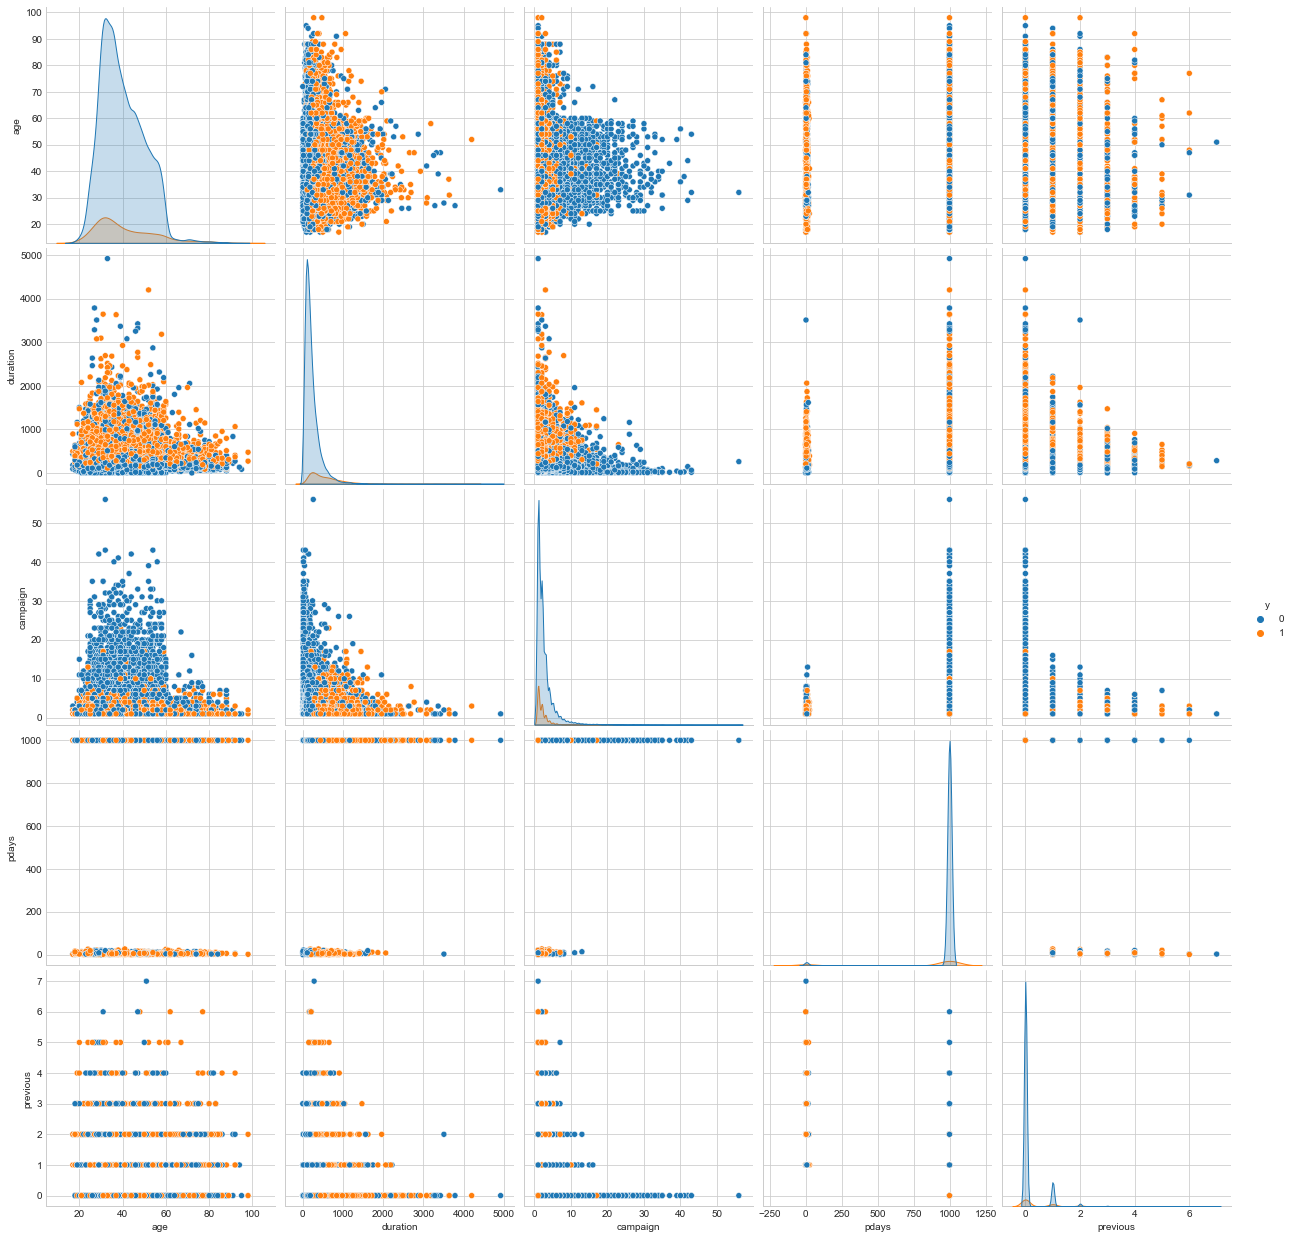

In [52]:
# Interaction between pairs of numerical columns related to client data and last contact
pairplot = sns.pairplot(data[['age', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue = 'y', diag_kind = 'kde', size = 3.5)
pairplot.savefig('pairplot.png')

### 4.3. Compare numerical values against categorical values

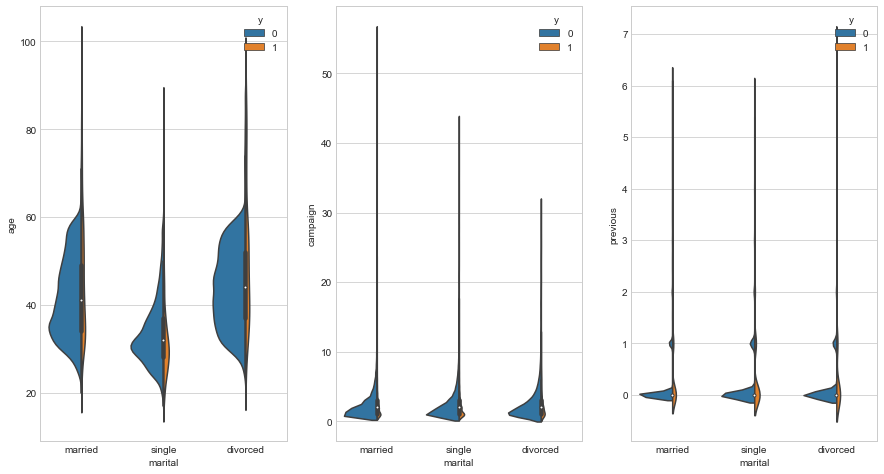

In [53]:
# Trends between marital status, age, number of contacts for this campaign and previous campaign on client's decision to subcribe to term deposit
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,8)) 
plt.subplot(1, 3, 1)
sns.violinplot(x='marital', y='age', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 2)
sns.violinplot(x='marital', y='campaign', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 3)
sns.violinplot(x='marital', y='previous', hue='y', data=data_con, split=True, scale='count');

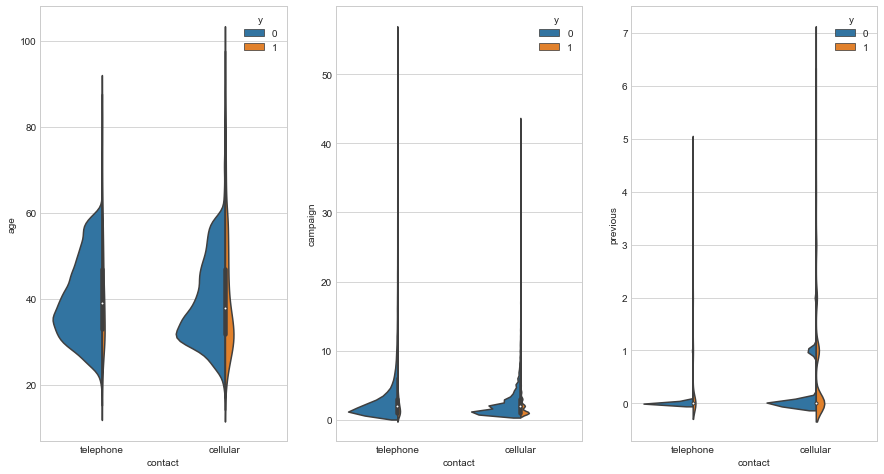

In [54]:
# Trends between contact, age, number of contacts for this campaign and previous campaign on client's decision to subcribe to term deposit
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,8)) 
plt.subplot(1, 3, 1)
sns.violinplot(x='contact', y='age', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 2)
sns.violinplot(x='contact', y='campaign', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 3)
sns.violinplot(x='contact', y='previous', hue='y', data=data_con, split=True, scale='count');

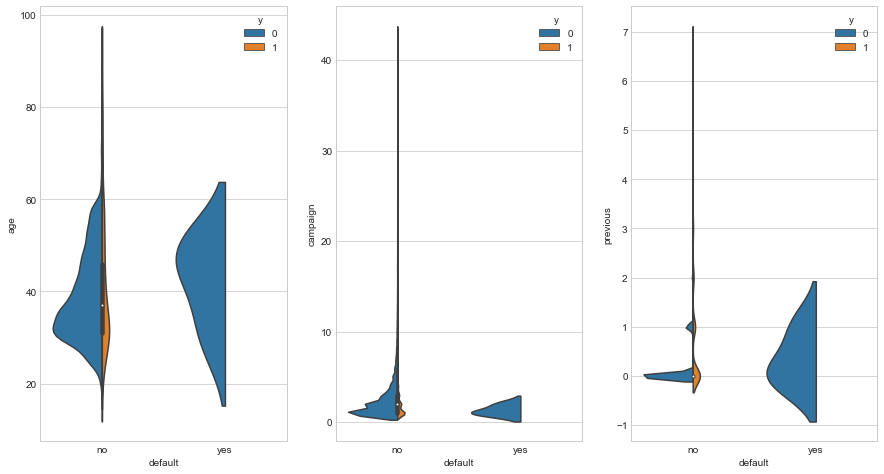

In [55]:
# Trends between default, age, number of contacts for this campaign and previous campaign on client's decision to subcribe to term deposit
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,8)) 
plt.subplot(1, 3, 1)
sns.violinplot(x='default', y='age', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 2)
sns.violinplot(x='default', y='campaign', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 3)
sns.violinplot(x='default', y='previous', hue='y', data=data_con, split=True, scale='count');

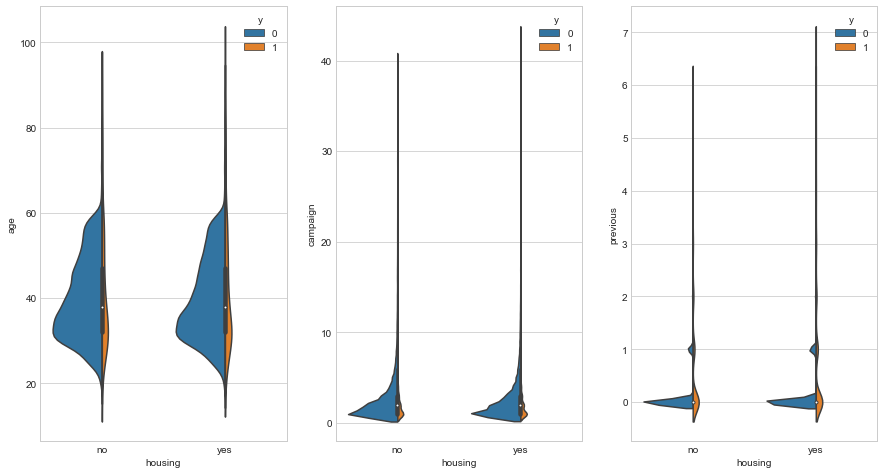

In [56]:
# Trends between housing loan, age, number of contacts for this campaign and previous campaign on client's decision to subcribe to term deposit
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,8)) 
plt.subplot(1, 3, 1)
sns.violinplot(x='housing', y='age', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 2)
sns.violinplot(x='housing', y='campaign', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 3)
sns.violinplot(x='housing', y='previous', hue='y', data=data_con, split=True, scale='count');

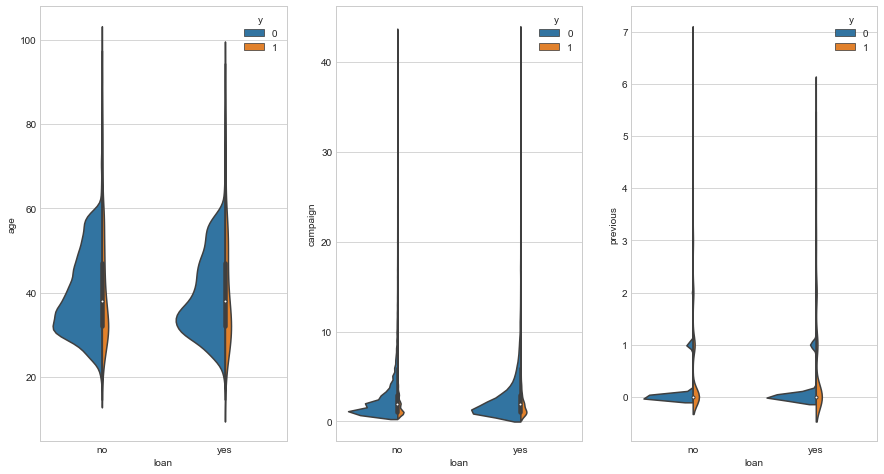

In [57]:
# Trends between personal loan, age, number of contacts for this campaign and previous campaign on client's decision to subcribe to term deposit
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,8)) 
plt.subplot(1, 3, 1)
sns.violinplot(x='loan', y='age', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 2)
sns.violinplot(x='loan', y='campaign', hue='y', data=data_con, split=True, scale='count');

plt.subplot(1, 3, 3)
sns.violinplot(x='loan', y='previous', hue='y', data=data_con, split=True, scale='count');

<AxesSubplot:xlabel='job', ylabel='age'>

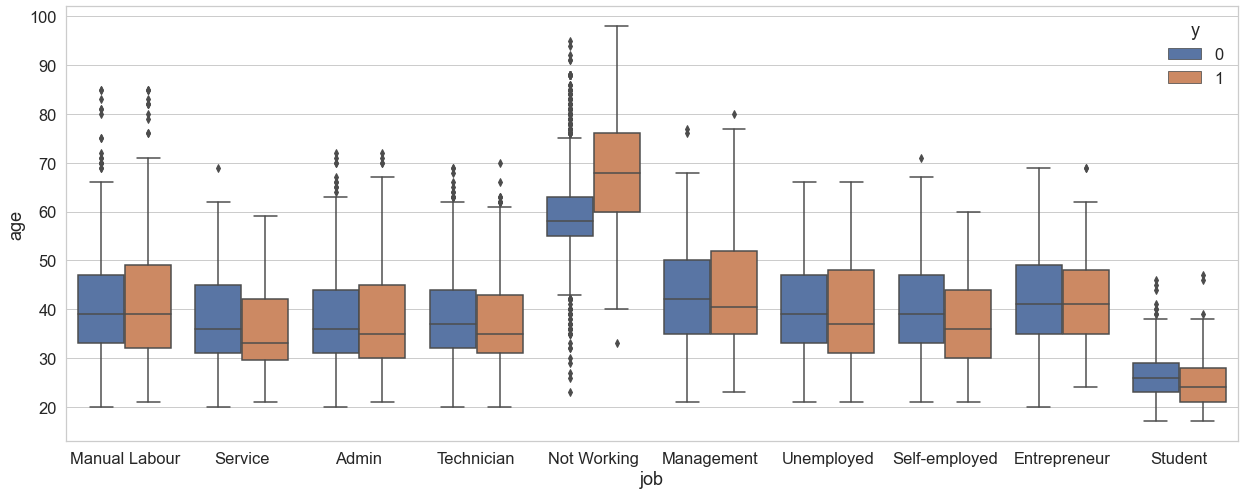

In [58]:
# Relationship between job and age gainst client's decision to subsribe to term deposit
sns.set(rc={'figure.figsize':(21,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'job', y = 'age', hue = 'y', data = data_con)

<AxesSubplot:xlabel='education', ylabel='age'>

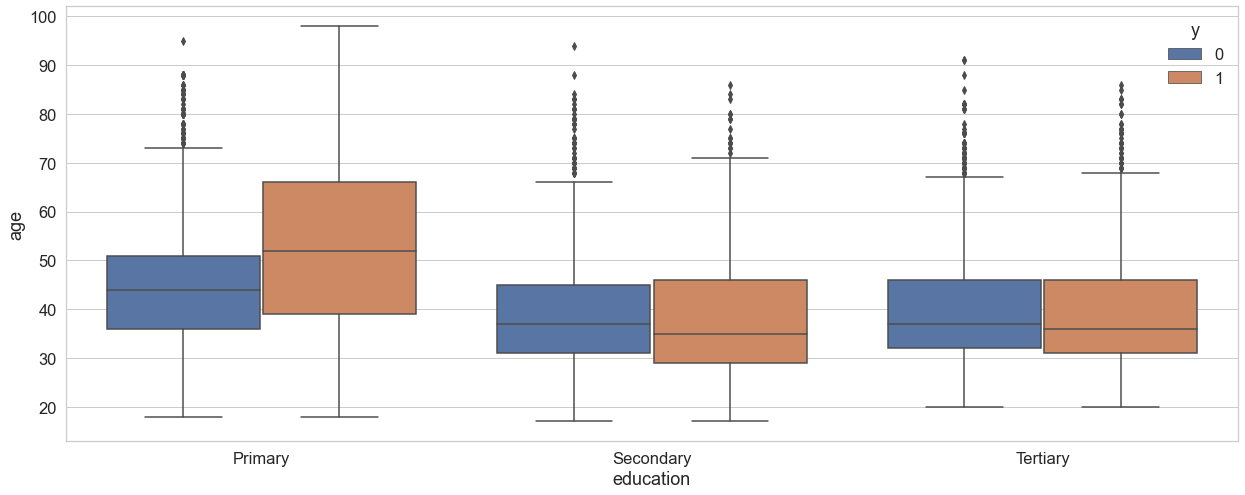

In [59]:
# Relationship between education and age gainst client's decision to subsribe to term deposit
sns.set(rc={'figure.figsize':(21,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'education', y = 'age', hue = 'y', data = data_con)

<AxesSubplot:xlabel='contact', ylabel='campaign'>

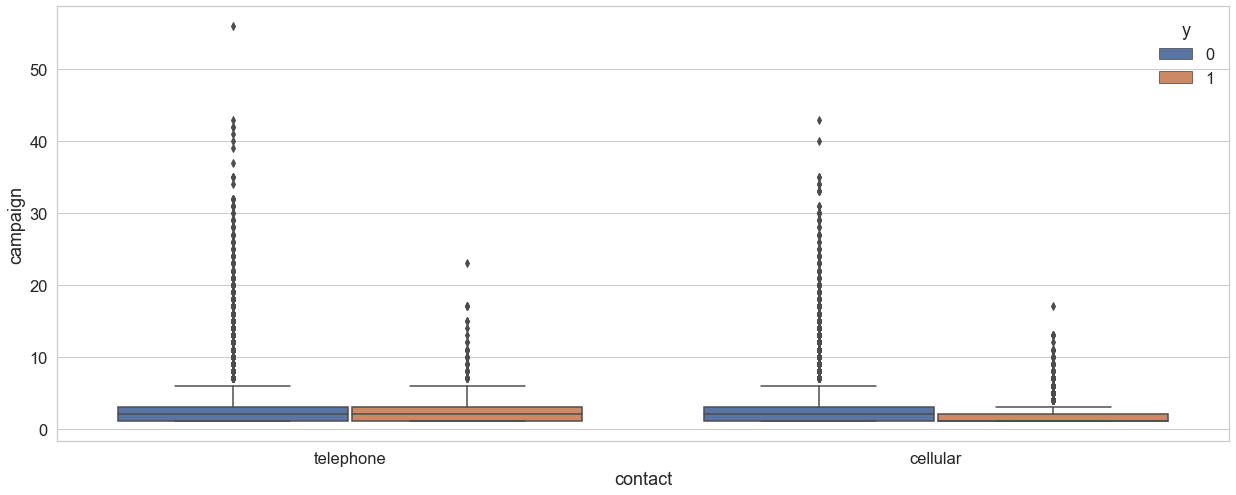

In [60]:
# Relationship between contact and number of contacts performed gainst client's decision to subsribe to term deposit
sns.set(rc={'figure.figsize':(21,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'contact', y = 'campaign', hue = 'y', data = data_con)

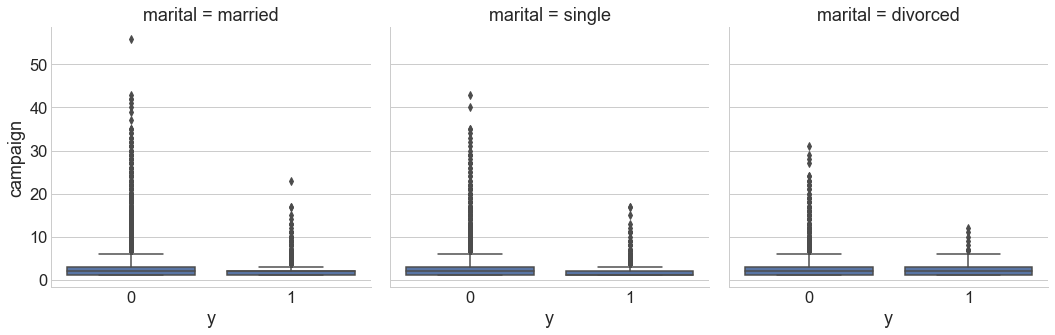

In [61]:
# Effect of Marital Status and Education on Income, across Marital Status.
plt.style.use('seaborn-whitegrid')
g = sns.FacetGrid(data_con, col='marital', size=5, aspect=1)
g = g.map(sns.boxplot, 'y', 'campaign')

## 5. Feature Encoding

Since Machine Learning algorithms perform Linear Algebra on matrices, all features have to be converted to numeric values by encoding. We will be  using both One-Hot and Label encoding. 

In [62]:
# One Hot encodes all labels before Machine Learning
one_hot_cols = data_bin.columns.tolist()
one_hot_cols.remove('y')
data_bin_enc = pd.get_dummies(data_bin, columns=one_hot_cols)

data_bin_enc.head()

,y,"age_(16.919, 25.1]","age_(25.1, 33.2]","age_(33.2, 41.3]","age_(41.3, 49.4]","age_(49.4, 57.5]","age_(57.5, 65.6]","age_(65.6, 73.7]","age_(73.7, 81.8]","age_(81.8, 89.9]",...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## 6. Feature Reduction/ Selection

TBC

## 7. Splitting Data into Testing & Training Set

TBC

## 8. Machine Learning Algorithms

TBC